# Support Vector Classifiers and Support Vector Machines
__MATH 3480__ - Dr. Michael Olson

Reading:
* Geron, Chapter 5

![Machine Learning Landscape](./Images/3480_ML_Landscape.png)

## Support Vector Classifiers

### The Concept behind Support Vector Classifiers
* Two datasets have a gap between them
* Draw a line to separate the datasets
  * The distance from the closest datapoint to the separator is known as the __margin__
  * When the separator is in the middle, the margin is maximized for both datasets. This is known as the __maximal margin classifier__ (mmc)
  * This margin has two problems:
    1. Only works if data is linearly separable
    2. Sensitive to outliers - If you have a datapoint from one dataset that is near the other dataset, the mmc is decreased and misplaced. New datapoints near the second dataset could be classified in the first dataset
* Bias/Variance tradeoff
  * If we force all points to be correct, we have *low bias*. However, this overfits the data, so our predictions will often be incorrect, giving us a *high variance*
  * If we allow misclassifications, we have *high bias*, but the predictions are more accurate, giving us a *low variance*
* Allow misclassifications (or *margin violations*)
  * When we allow misclassifications, then we call that margin a __soft margin__
* Determine best soft margin
  * Use cross validation
  
Using a soft margin is a machine learning model known as a __soft margin classifier__, more commonly known as a __Support Vector Classifier__ (SVC)
* With 2-dimensional data, the SVC is a line
* With 3-dimensional data, the SVC is a plane
* ...
* With n dimensions, the SVC has n-1 dimensions

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

In [44]:
iris = datasets.load_iris()
iris
# print(iris['data'][:10,:])
# print(iris['feature_names'])

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

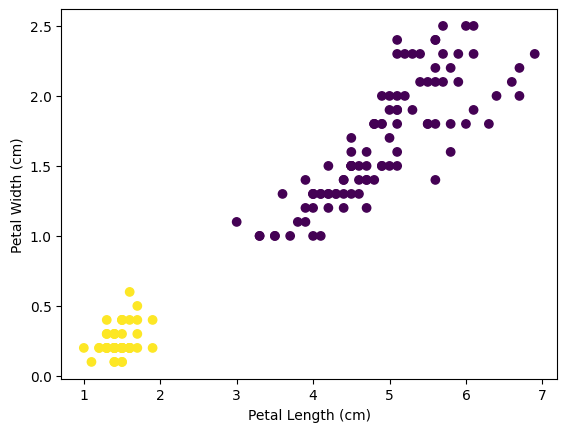

In [45]:
setosa = iris['target'] == 0

fig = plt.figure()
plt.scatter(iris['data'][:,2], iris['data'][:,3], c=setosa)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

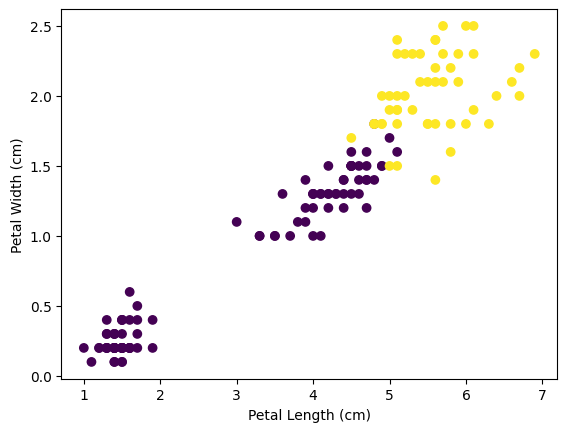

In [5]:
virginica = iris['target'] == 2

fig = plt.figure()
plt.scatter(iris['data'][:,2], iris['data'][:,3], c=virginica)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [48]:
import numpy as np
from Code import SVCdemo as demo
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

def run_demo(num_iters=10):
    # Load iris dataset
    iris = load_iris()
    X = iris.data[:, 2:4]  # petal length and petal width
    y = iris.target

    # Create binary classification: setosa (0) vs others (1, 2)
    y_binary = (y != 0).astype(int)
    y_binary = 2 * y_binary - 1  # Convert to -1, 1 for SVM

    # Extract features
    petal_length = X[:, 0]
    petal_width = X[:, 1]

    # Separate classes for plotting
    setosa_mask = y_binary == -1
    other_mask = y_binary == 1

    print("=" * 60)
    print("Support Vector Classifier - Margin Expansion Demonstration")
    print("=" * 60)
    print()

    # Step 1: Start with a simple vertical line at petal_length ≈ 3
    print("Step 1: Starting with initial boundary (vertical line at petal_length ≈ 3)")
    w_init = np.array([6.0, 0.0])  # Vertical line
    b_init = -3.0  # Around x1 = 3

    margin_init, valid_init = demo.compute_margin(w_init, b_init, X, y_binary)
    if valid_init:
        print(f"  Initial margin: {margin_init:.4f}")
    else:
        print("  Initial boundary doesn't separate classes correctly")

    # Step 2: Iteratively expand margin
    print("\nStep 2: Expanding margin iteratively...")
    print("  (Searching for optimal hyperplane)")

    # Try different orientations and positions
    best_margin = 0
    best_w = w_init
    best_b = b_init

    # Grid search over different hyperplane orientations
    angles = np.linspace(-np.pi/2, np.pi/2, 50)
    offsets = np.linspace(-5, 5, 50)

    iteration = 0
    for angle in angles:
        w_test = np.array([np.cos(angle), np.sin(angle)])
        
        for offset in offsets:
            b_test = offset
            margin, valid = demo.compute_margin(w_test, b_test, X, y_binary)
            
            if valid and margin > best_margin:
                best_margin = margin
                best_w = w_test
                best_b = b_test
                iteration += 1
                
                if iteration % 50 == 0:
                    print(f"  Iteration {iteration}: margin = {best_margin:.4f}")

    print(f"\nStep 3: Optimal margin found: {best_margin:.4f}")
    print(f"  Decision boundary: {best_w[0]:.4f}*x1 + {best_w[1]:.4f}*x2 + {best_b:.4f} = 0")

    # Step 4: Refine with gradient descent
    print("\nStep 4: Refining with gradient descent optimization...")
    w_final, b_final = demo.train_svm(X, y_binary, learning_rate=0.001, epochs=num_iters, C=10.0)

    # Normalize w so that margin constraints are w·x + b = ±1
    # Find support vectors (points closest to the boundary)
    distances = y_binary * (X @ w_final + b_final)
    support_vector_idx = np.argmin(np.abs(distances - 1))
    scaling_factor = 1.0 / distances[support_vector_idx]
    w_final *= scaling_factor
    b_final *= scaling_factor

    margin_final, _ = demo.compute_margin(w_final, b_final, X, y_binary)
    print(f"  Final margin: {margin_final:.4f}")
    print(f"  Final decision boundary: {w_final[0]:.4f}*x1 + {w_final[1]:.4f}*x2 + {b_final:.4f} = 0")

    # Identify support vectors
    margins = y_binary * (X @ w_final + b_final)
    support_vectors = np.abs(margins - 1) < 0.1
    print(f"\nNumber of support vectors: {np.sum(support_vectors)}")

    # Plot final result
    plt.figure(figsize=(12, 6))

    # Plot points
    setosa_mask = y_binary == -1
    other_mask = y_binary == 1

    plt.scatter(X[setosa_mask, 0], X[setosa_mask, 1], 
                c='blue', marker='o', s=100, label='Setosa', edgecolors='k', alpha=0.7)
    plt.scatter(X[other_mask, 0], X[other_mask, 1], 
                c='red', marker='s', s=100, label='Others (Versicolor & Virginica)', 
                edgecolors='k', alpha=0.7)

    # Highlight support vectors
    plt.scatter(X[support_vectors, 0], X[support_vectors, 1], 
                s=300, facecolors='none', edgecolors='green', linewidths=3,
                label='Support Vectors')

    # Create grid for decision boundary
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2

    # Plot decision boundary: w1*x1 + w2*x2 + b = 0
    x1_line = np.array([x1_min, x1_max])
    x2_line = -(w_final[0] * x1_line + b_final) / w_final[1]
    plt.plot(x1_line, x2_line, 'k-', linewidth=2.5, label='Decision Boundary')

    # Plot margins: w1*x1 + w2*x2 + b = ±1
    x2_margin_plus = -(w_final[0] * x1_line + b_final - 1) / w_final[1]
    x2_margin_minus = -(w_final[0] * x1_line + b_final + 1) / w_final[1]
    plt.plot(x1_line, x2_margin_plus, 'k--', linewidth=2, label='Margin Boundaries')
    plt.plot(x1_line, x2_margin_minus, 'k--', linewidth=2)

    plt.xlabel('Petal Length (cm)', fontsize=13, fontweight='bold')
    plt.ylabel('Petal Width (cm)', fontsize=13, fontweight='bold')
    plt.title(f'Maximal Margin Classifier (SVM)\nMargin Width: {margin_final:.4f} cm', 
            fontsize=15, fontweight='bold')
    plt.legend(fontsize=11, loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)

    plt.tight_layout()
    # plt.savefig('/mnt/user-data/outputs/svc_maximal_margin.png', dpi=300, bbox_inches='tight')
    plt.show()

    # print("\n" + "=" * 60)
    # print("Visualization saved!")
    # print("=" * 60)

Support Vector Classifier - Margin Expansion Demonstration

Step 1: Starting with initial boundary (vertical line at petal_length ≈ 3)
  Initial boundary doesn't separate classes correctly

Step 2: Expanding margin iteratively...
  (Searching for optimal hyperplane)

Step 3: Optimal margin found: 0.6375
  Decision boundary: 0.9144*x1 + 0.4048*x2 + -2.5510 = 0

Step 4: Refining with gradient descent optimization...
  Final margin: -1.0000
  Final decision boundary: 0.1526*x1 + -0.0231*x2 + 0.0000 = 0

Number of support vectors: 6


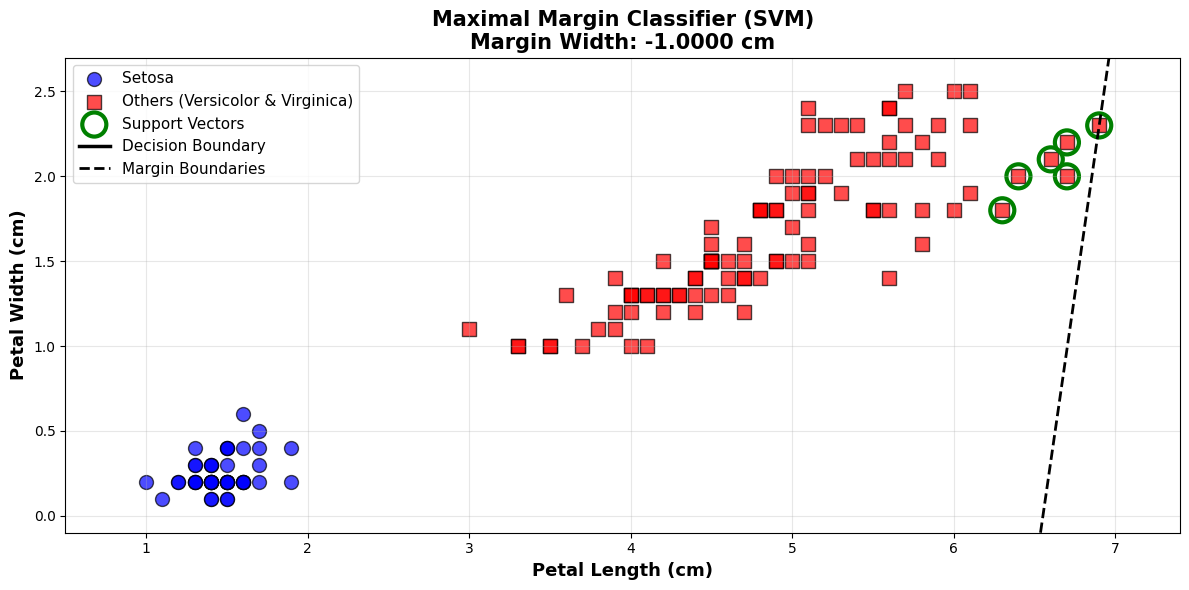

In [49]:
run_demo(num_iters=0)

Text(0, 0.5, 'Petal Width (cm)')

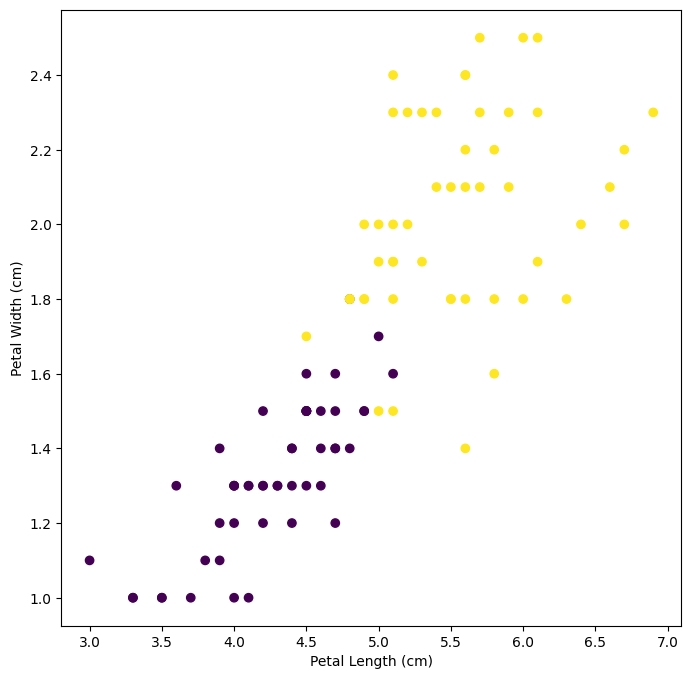

In [35]:
fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot()
ax.scatter(#iris['data'][50:,0],
           iris['data'][50:,2],
           iris['data'][50:,3],
           c=iris['target'][:100])
          
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

## Preprocessing
1. Missing Data - No missing values in this example
2. Encode Categorical Variables - Using original data, no categorical variables
3. Split the data
4. Feature Scaling

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
list(iris)

In [ ]:
iris['feature_names']

In [39]:
X = iris['data'][:,(2,3)]
y_true = (iris['target'] == 2).astype(np.float64)

## SVC model

In [38]:
svc = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])

In [41]:
svc.fit(X,y)
y_pred = svc.predict(X)

Description of hyperparameters:
* `C` is the regularization parameter - determines the number of misclassifications
  * High C means we regularize more (allow fewer misclassifications) - smaller margins
  * Low C means we regularize less (allow more misclassifications) - larger margins
* `loss` is the loss function
  * None selected by default - we have to set one to run the model
  * `hinge` is the typical loss type

## Evaluate the model

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

[[97  3]
 [ 4 46]]
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97       100
         1.0       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



Text(0, 0.5, 'Petal Width (cm)')

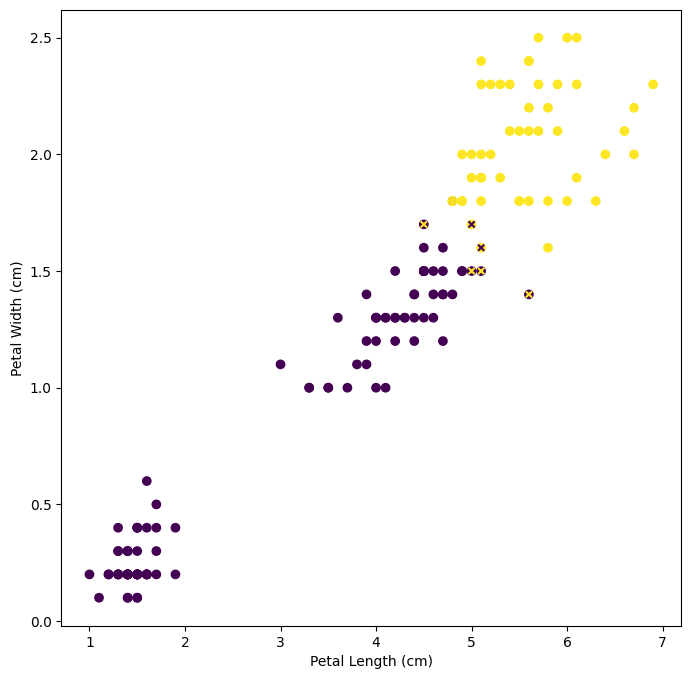

In [43]:
fig = plt.figure(figsize=(8,8))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot()
ax.scatter(X[:,0], X[:,1], c=y_pred)
ax.scatter(X[:,0], X[:,1], c=y_true, marker='x', s=20)
          
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')